# Iris classification



## Step1- Importing required libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step2- Retrieve the  data

In [4]:
iris = pd.read_csv('IRIS.csv')

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step3-Analyse the data

**Check if there is no missing data in Iris dataset.**

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Check that the classes are well balanced.**
You can use coutplot from sns.

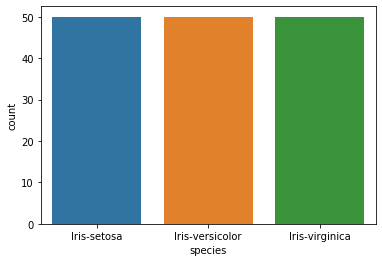

In [7]:
sns.countplot(x='species',data=iris)

## Step4- Preparing the data into train and test

**Put the dataset features in X and labels in y.**

In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

**Split the data into training set and testing set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**

Let's assume we decided to split the dataset into 60% train data and 40% test data.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Step5 **Import Random Forest from scikit learn**

**Import random forest from scikit learn.**

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5,random_state=101)

## Step6 **Train the model**

**Fit this random forest model to the training data.** 

you should use the scaled one.

In [13]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=101)

## Step 7 - Prediction and evaluation

**Use the predict method to predict values using your Random Forest model and X_test.**

In [14]:
y_pred = clf.predict(X_test)

## Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.
Take a look at the following script: [help](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**Create a confusion matrix and classification report.**

In [15]:
from sklearn import metrics

In [16]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



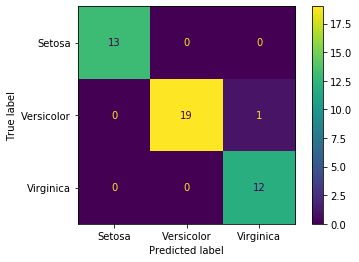

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()